# Imports

In [47]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# DATA LOADING AND PROCESSING 

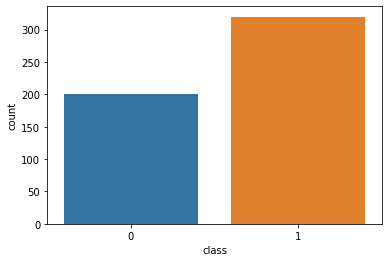

In [48]:
## loading data
data = pd.read_csv("diabetes_data_upload (1).csv")


## encdoing categorical columns
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
    
## scaling age column
scaler = MinMaxScaler()
data["Age"] = scaler.fit_transform(data[['Age']])

## Seperating data and lables
X = data.drop(["class"], axis = 1)
y = data["class"]

## plotting class labels count plot 
fig = sns.countplot(y);

## Spliting data to train and test splits 
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 12)

#Saving Train and Test splits to CSV Files
train = X_train.copy()
train["class"] = y_train
train.to_csv("train.csv", index = False)
test = X_test.copy()
test["class"] = y_test
test.to_csv("test.csv", index = False)


## Spliting train data further to validation split 
X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size = 0.2, random_state = 12)

In [49]:
X_train.count()

Age                   332
Gender                332
Polyuria              332
Polydipsia            332
sudden weight loss    332
weakness              332
Polyphagia            332
Genital thrush        332
visual blurring       332
Itching               332
Irritability          332
delayed healing       332
partial paresis       332
muscle stiffness      332
Alopecia              332
Obesity               332
dtype: int64

In [50]:
## Heatmap

corrdata = data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

<AxesSubplot:>

In [51]:
data['Gender'].value_counts()

1    328
0    192
Name: Gender, dtype: int64

<h1>(i) WITHOUT HYPER PARAMAETER TUNING</h1>

## TRAINING 

In [52]:
## instantiating model
svm = SVC(probability=True)

## training model on train set
svm.fit(X_train, y_train);

In [53]:
print("Accuracy on train set: ", svm.score(X_train, y_train))

Accuracy on train set:  0.9909638554216867


<h1>(ii) HYPERPARAMETER TUNING</h1>

## Effect of choice of kernel 

In [54]:
kernel = ["linear", "poly"]
C = 1
gamma = 1 

for k in kernel:
    svm = SVC(kernel=k ,C= C,
              gamma= gamma,
              probability=True)
    svm.fit(X_train, y_train)
    print(f" Kerneel: {k}, Validation-Set Accuracy =  {(svm.score(X_valid,y_valid)*100):>0.2f}%  ")

 Kerneel: linear, Validation-Set Accuracy =  89.29%  
 Kerneel: poly, Validation-Set Accuracy =  94.05%  


<center><h3>Poly kernel provides best score on valid set</h3> </center>

## Effect of Polynomial Degree 

In [55]:
kernel = "poly"
C = 1
gamma = 1 
degree = [1, 2, 3, 4, 5, 6]
for d in degree:
    svm = SVC(kernel= kernel ,C= C,
              gamma= gamma,
              degree = d,
              probability=True)
    svm.fit(X_train, y_train)
    print(f" Value of Degree: {d}, Validation-Set Accuracy =  {(svm.score(X_valid,y_valid)*100):>0.2f}%  ")

 Value of Degree: 1, Validation-Set Accuracy =  89.29%  
 Value of Degree: 2, Validation-Set Accuracy =  92.86%  
 Value of Degree: 3, Validation-Set Accuracy =  94.05%  
 Value of Degree: 4, Validation-Set Accuracy =  94.05%  
 Value of Degree: 5, Validation-Set Accuracy =  94.05%  
 Value of Degree: 6, Validation-Set Accuracy =  92.86%  


<center><h3>Order 3 has the best score set</h3> </center>

## Effect of value of C

In [56]:
kernel = "poly"
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = 1
degree =3

for c in C:
    svm = SVC(kernel= kernel ,C= c,
              gamma= gamma,
              degree= degree,
              probability=True)
    svm.fit(X_train, y_train)
    print(f" Value of C: {c}, Validation-Set Accuracy =  {(svm.score(X_valid,y_valid)*100):>0.2f}%  ")

 Value of C: 0.1, Validation-Set Accuracy =  91.67%  
 Value of C: 0.2, Validation-Set Accuracy =  91.67%  
 Value of C: 0.3, Validation-Set Accuracy =  90.48%  
 Value of C: 0.4, Validation-Set Accuracy =  92.86%  
 Value of C: 0.5, Validation-Set Accuracy =  92.86%  
 Value of C: 0.6, Validation-Set Accuracy =  92.86%  
 Value of C: 0.7, Validation-Set Accuracy =  94.05%  
 Value of C: 0.8, Validation-Set Accuracy =  94.05%  
 Value of C: 0.9, Validation-Set Accuracy =  94.05%  
 Value of C: 1, Validation-Set Accuracy =  94.05%  


<center><h3> C value of 0.7 provides best score on valid set</h3> </center>

## Effect of value of gamma 

In [57]:
kernel = "poly"
C = 0.7
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
degree = 3

for g in gamma:
    svm = SVC(kernel= kernel ,C= C,
              gamma= g,
              degree= degree,
              probability=True)
    svm.fit(X_train, y_train)
    print(f" Value of gamma : {g}, Validation-Set Accuracy =  {(svm.score(X_valid,y_valid)*100):>0.2f}%  ")

 Value of gamma : 0.1, Validation-Set Accuracy =  80.95%  
 Value of gamma : 0.2, Validation-Set Accuracy =  88.10%  
 Value of gamma : 0.3, Validation-Set Accuracy =  92.86%  
 Value of gamma : 0.4, Validation-Set Accuracy =  92.86%  
 Value of gamma : 0.5, Validation-Set Accuracy =  92.86%  
 Value of gamma : 0.6, Validation-Set Accuracy =  91.67%  
 Value of gamma : 0.7, Validation-Set Accuracy =  90.48%  
 Value of gamma : 0.8, Validation-Set Accuracy =  92.86%  
 Value of gamma : 0.9, Validation-Set Accuracy =  92.86%  
 Value of gamma : 1, Validation-Set Accuracy =  94.05%  


<center><h3> Gamma value of 1 provides best score on valid set</h3> </center>

<h1>(iii) Final Model with optimized hyperparameters </h1>

In [58]:
## Instantiaing model with optimal hyperparameter tuned parameters
svm_optimal = SVC(
    C = 0.7, 
    gamma = 1, 
    kernel = "poly" ,
    degree = 3,
    probability=True , )

## training on train  data 
svm_optimal.fit(X_train, y_train);

## Saving optimal hyperparameter tuned model 

In [59]:
import pickle
file_name = 'SVM-Model'
pickle.dump(svm_optimal, open(file_name, 'wb'))

## EVALUATION 

## Loading saved optimal hyperparameter tuned model 

In [60]:
svm_model = pickle.load(open(file_name, 'rb'))

In [61]:
print("Accuracy on train set: ", svm_optimal.score(X_train, y_train))
print("Accuracy on train set: ", svm_optimal.score(X_valid, y_valid))
print("Accuracy on test set: ", svm_optimal.score(X_test, y_test))

Accuracy on train set:  0.9939759036144579
Accuracy on train set:  0.9404761904761905
Accuracy on test set:  0.9423076923076923


### Classification Report 

In [62]:
y_train_preds = svm_optimal.predict(X_train)
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.99      1.00      1.00       201

    accuracy                           0.99       332
   macro avg       1.00      0.99      0.99       332
weighted avg       0.99      0.99      0.99       332



In [63]:
y_valid_preds = svm_optimal.predict(X_valid)
print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.98      0.93      0.96        61

    accuracy                           0.94        84
   macro avg       0.91      0.95      0.93        84
weighted avg       0.95      0.94      0.94        84



In [64]:
y_test_preds = svm_optimal.predict(X_test)
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.96      0.93      0.95        58

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



### Confusion Matrix

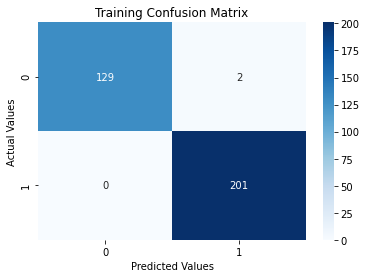

In [71]:
## ploting Training confusion matrix
cf = confusion_matrix(y_train, y_train_preds)

fig = sns.heatmap(cf,  annot=True, cmap='Blues', fmt='g')
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values')
fig.set_title('Training Confusion Matrix')

plt.show()

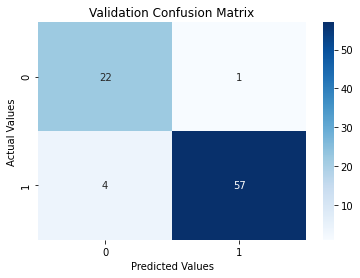

In [66]:
## ploting Validating confusion matrix
cf = confusion_matrix(y_valid, y_valid_preds)

fig = sns.heatmap(cf,  annot=True, cmap='Blues')
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values')
fig.set_title('Validation Confusion Matrix')

plt.show()

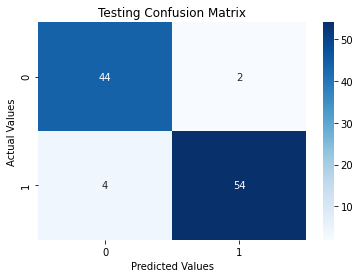

In [67]:
## ploting Testing confusion matrix
cf = confusion_matrix(y_test, y_test_preds)

fig = sns.heatmap(cf,  annot=True, cmap='Blues')
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values')
fig.set_title('Testing Confusion Matrix')

plt.show()

### ROC-AUC Curve

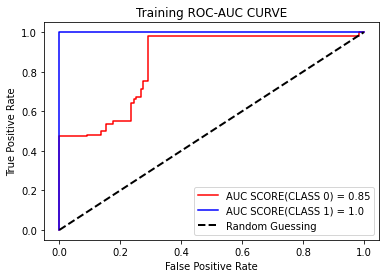

In [68]:
## ploting training auc-roc curve
probs = svm_optimal.predict_proba(X_train)[:,1]
labels = y_train.values
neg_probs = []
for i in range(len(labels)):
    if labels[i] == 0 :
        neg_probs.append(1 - probs[i])
    else :
        neg_probs.append(probs[i])
## ploting auc-roc curve
neg_auc_score = roc_auc_score(labels, neg_probs)
auc_score = roc_auc_score(labels, probs)

fpr, tpr, _ = roc_curve(labels, neg_probs)
plt.plot(fpr, tpr, color ="red", label="AUC SCORE(CLASS 0) = "+str(round(neg_auc_score,2)))
fpr, tpr, _ = roc_curve(labels, probs)
plt.plot(fpr, tpr, color = "blue", label="AUC SCORE(CLASS 1) = "+str(round(auc_score,2)))
plt.plot(fpr, fpr, color = 'black', linestyle='dashed',lw=2 , label = 'Random Guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Training ROC-AUC CURVE")
plt.legend()
plt.show()

In [69]:
## ploting validating auc-roc curve
probs = svm_optimal.predict_proba(X_valid)[:,1]
labels = y_valid.values
neg_probs = []
for i in range(len(labels)):
    if labels[i] == 0 :
        neg_probs.append(1 - probs[i])
    else :
        neg_probs.append(probs[i])
## ploting auc-roc curve
neg_auc_score = roc_auc_score(labels, neg_probs)
auc_score = roc_auc_score(labels, probs)

fpr, tpr, _ = roc_curve(labels, neg_probs)
plt.plot(fpr, tpr, color ="red", label="AUC SCORE(CLASS 0) = "+str(round(neg_auc_score,2)))
fpr, tpr, _ = roc_curve(labels, probs)
plt.plot(fpr, tpr, color = "blue", label="AUC SCORE(CLASS 1) = "+str(round(auc_score,2)))
plt.plot(fpr, fpr, color = 'black', linestyle='dashed',lw=2 , label = 'Random Guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Validating ROC-AUC CURVE")
plt.legend()
plt.show()

In [70]:
## ploting testing auc-roc curve
probs = svm_optimal.predict_proba(X_test)[:,1]
labels = y_test.values
neg_probs = []
for i in range(len(labels)):
    if labels[i] == 0 :
        neg_probs.append(1 - probs[i])
    else :
        neg_probs.append(probs[i])
## ploting auc-roc curve
neg_auc_score = roc_auc_score(labels, neg_probs)
auc_score = roc_auc_score(labels, probs)

fpr, tpr, _ = roc_curve(labels, neg_probs)
plt.plot(fpr, tpr, color ="red", label="AUC SCORE(CLASS 0) = "+str(round(neg_auc_score,2)))
fpr, tpr, _ = roc_curve(labels, probs)
plt.plot(fpr, tpr, color = "blue", label="AUC SCORE(CLASS 1) = "+str(round(auc_score,2)))
plt.plot(fpr, fpr, color = 'black', linestyle='dashed',lw=2 , label = 'Random Guessing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Testing ROC-AUC CURVE")
plt.legend()
plt.show()